In [12]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D, Flatten, Dense
import numpy as np
import pandas as pd

(x_train,y_train),(x_test,y_test)=cifar100.load_data()
x = x_test

Label = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']

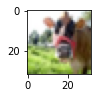

[19]


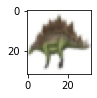

[29]


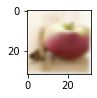

[0]


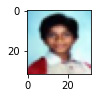

[11]


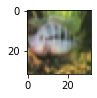

[1]


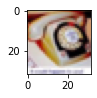

[86]


In [13]:
for i in range(6):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
  plt.show()
  print(y_train[i])

In [14]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [15]:
# MODEL CNN
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D

model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 3
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 4
model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

#output
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))

In [16]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [18]:
history = model.fit(x_train,y_train, batch_size=128, epochs=60, verbose=1, validation_data=(x_test,y_test))

Epoch 1/60
391/391 [==============================] - 16s 40ms/step - loss: 3.2800 - accuracy: 0.2040 - val_loss: 3.1497 - val_accuracy: 0.2348
Epoch 2/60
391/391 [==============================] - 16s 42ms/step - loss: 2.9472 - accuracy: 0.2658 - val_loss: 2.9243 - val_accuracy: 0.2719
Epoch 3/60
391/391 [==============================] - 16s 41ms/step - loss: 2.6834 - accuracy: 0.3172 - val_loss: 2.6833 - val_accuracy: 0.3226
Epoch 4/60
391/391 [==============================] - 17s 42ms/step - loss: 2.4339 - accuracy: 0.3679 - val_loss: 2.6384 - val_accuracy: 0.3320
Epoch 5/60
391/391 [==============================] - 16s 41ms/step - loss: 2.2131 - accuracy: 0.4153 - val_loss: 2.4693 - val_accuracy: 0.3714
Epoch 6/60
391/391 [==============================] - 16s 42ms/step - loss: 2.0108 - accuracy: 0.4569 - val_loss: 2.4509 - val_accuracy: 0.3802
Epoch 7/60
391/391 [==============================] - 16s 41ms/step - loss: 1.8198 - accuracy: 0.5032 - val_loss: 2.4519 - val_accuracy:

In [19]:
model.save('cifar100_CNN.h5')

In [20]:
from keras.models import load_model
models = load_model('cifar100_CNN.h5')

In [21]:
score = model.evaluate(x_test, y_test,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 4.7657 - accuracy: 0.3778
Test loss=  4.7657036781311035
Test accuracy=  0.37779998779296875


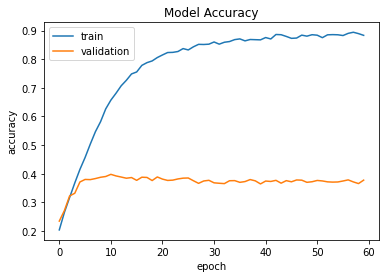

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

In [23]:
y_predict = model.predict(x_test)

# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_predict[random_index]

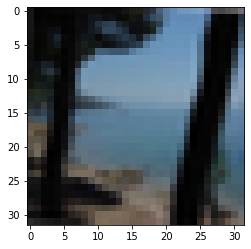

palm_tree


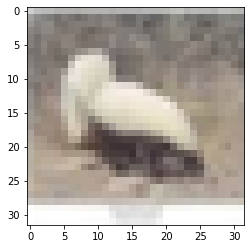

trout


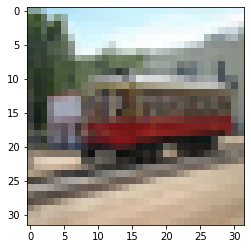

bus


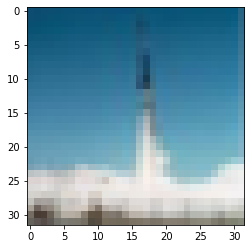

rocket


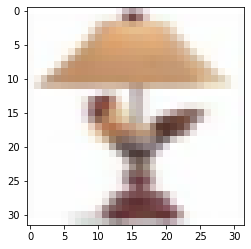

mushroom


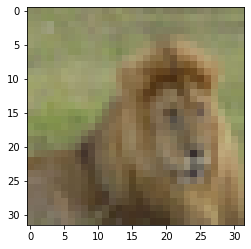

beetle


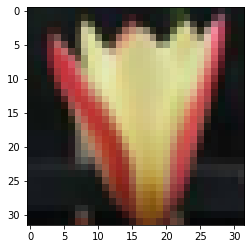

tulip


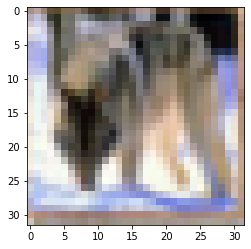

lobster


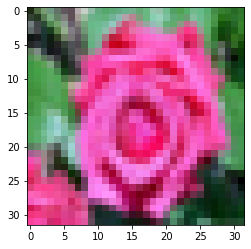

rose


In [26]:
for i in range(9):
    plt.imshow(x[i+10])
    plt.show()
    #print(np.round(y_predict[i]))
    print(Label[np.argmax(y_predict[i+10])])
